<a href="https://colab.research.google.com/github/nhanguyenai/HomeWork-Predict/blob/main/ModelPredictFlower-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import glob
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as keras

from google.colab import drive
drive.mount('/content/drive')


dataset_path = '/content/drive/My Drive/'


specific_flowers = ['hoacuc', 'hoavang','champaka','Hibiscus','sunflower']


image_paths = []
labels = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".jpg"):
            file_path = os.path.join(root, file)


            for flower in specific_flowers:
                if flower in file_path:
                    image_paths.append(file_path)
                    labels.append(flower)
                    break
            else:

                print(f"Skipping file: {file_path} (does not contain any of the specified flowers)")


if len(image_paths) == 0:
    print("No images found matching your criteria. Please check your dataset path and file names.")
else:

    df = pd.DataFrame({'filename': image_paths, 'class': labels})


    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)




datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='training'
)
validation_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='class',
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


model = Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(specific_flowers), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100
)


model.save("flower6.h5")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1612 validated image filenames belonging to 5 classes.
Found 403 validated image filenames belonging to 5 classes.
Found 504 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 795s 15s/step - accuracy: 0.4002 - loss: 5.5876 - val_accuracy: 0.5608 - val_loss: 0.8370
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - accuracy: 0.6270 - loss: 0.7678 - val_accuracy: 0.6154 - val_loss: 0.7598
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.7691 - loss: 0.5180 - val_accuracy: 0.6849 - val_loss: 0.6223
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.8647 - loss: 0.3237 - val_accuracy: 0.6650 - val_loss: 0.7761
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 228ms/step - accuracy: 0.9011 - loss: 0.2379 - val_accuracy: 0.7072 - val_loss: 0.6800
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - accuracy: 0.9133 - loss: 0.1808 - val_accuracy: 0.6774 - val_loss: 0.7047
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.9428 - loss: 0.1390 - val_accuracy: 0.6625 - val_loss: 0.9999
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.9546 - loss: 0.1011 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step
Xác suất của các lớp: [[2.4329004e-01 5.9891859e-04 1.3859784e-03 6.9218481e-01 6.2540248e-02]]
Dự đoán nhãn: Hibiscus


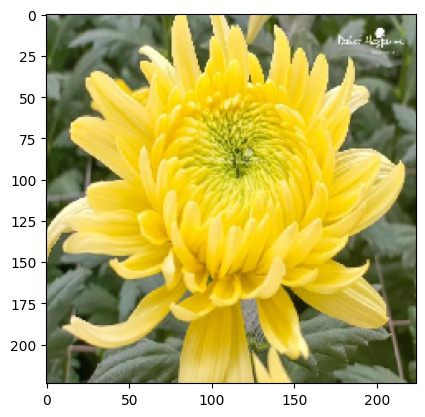

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import drive
import os


model_path = '/content/flower6.h5'
model = tf.keras.models.load_model(model_path)


def predict_image(img_path, model):

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0


    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    return predictions, predicted_class

img_path = '/content/hoavang.jpg'


predictions, predicted_label = predict_image(img_path, model)

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)


print(f"Xác suất của các lớp: {predictions}")

print(f"Dự đoán nhãn: {specific_flowers[predicted_label[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
Xác suất của các lớp: [[4.2872551e-05 5.6316085e-06 1.0976957e-01 8.9017099e-01 1.0973126e-05]]
Dự đoán nhãn: Hibiscus


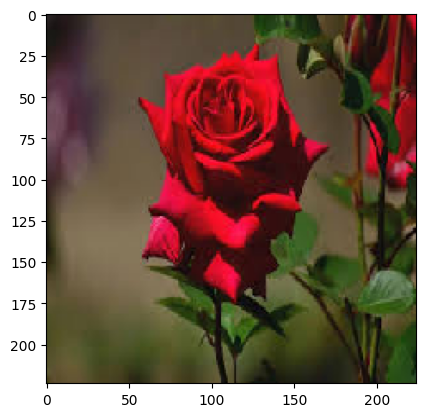

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import drive
import os


model_path = '/content/flower6.h5'
model = tf.keras.models.load_model(model_path)


def predict_image(img_path, model):

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0


    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    return predictions, predicted_class

img_path = '/content/hoahong.jpg'


predictions, predicted_label = predict_image(img_path, model)

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)


print(f"Xác suất của các lớp: {predictions}")

print(f"Dự đoán nhãn: {specific_flowers[predicted_label[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Xác suất của các lớp: [[1.5502716e-03 9.3997522e-05 8.5673845e-01 1.4132711e-01 2.9016961e-04]]
Dự đoán nhãn: champaka


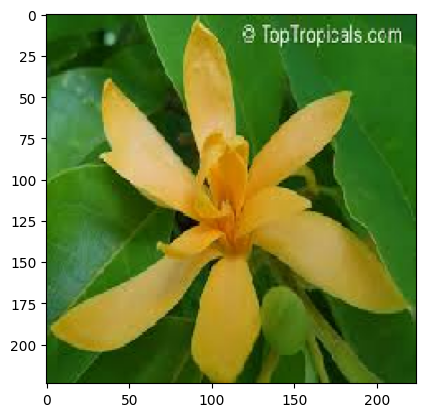

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import drive
import os


model_path = '/content/flower6.h5'
model = tf.keras.models.load_model(model_path)


def predict_image(img_path, model):

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0


    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    return predictions, predicted_class

img_path = '/content/champaka.jpg'


predictions, predicted_label = predict_image(img_path, model)

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)


print(f"Xác suất của các lớp: {predictions}")

print(f"Dự đoán nhãn: {specific_flowers[predicted_label[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Xác suất của các lớp: [[1.9281259e-05 9.8108949e-06 6.9351955e-03 4.2664289e-01 5.6639278e-01]]
Dự đoán nhãn: sunflower


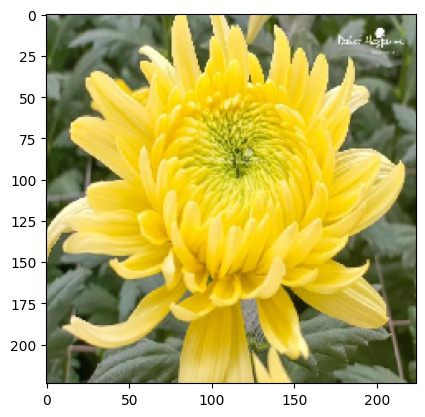

In [ ]:
model_path = '/content/flower6.h5'
model = tf.keras.models.load_model(model_path)


def predict_image(img_path, model):

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0


    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    return predictions, predicted_class

img_path = '/content/huongduong.jpg'


predictions, predicted_label = predict_image(img_path, model)

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)


print(f"Xác suất của các lớp: {predictions}")

print(f"Dự đoán nhãn: {specific_flowers[predicted_label[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Xác suất của các lớp: [[1.3858171e-09 1.9281700e-07 9.9997199e-01 2.7819429e-05 4.0242302e-13]]
Dự đoán nhãn: champaka


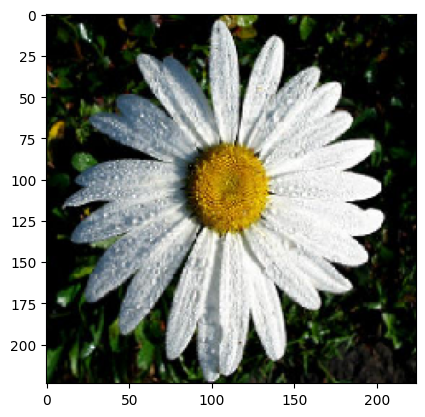

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split

# 1. Kết nối Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Đường dẫn đến thư mục chính chứa 5 folder dataset hoa trên Drive của bạn
main_dir = '/content/drive/MyDrive/flower_dataset' # Thay đổi đường dẫn này nếu cần

# Tên của 5 loài hoa (tên của 5 folder con)
class_names = os.listdir(main_dir)
print("Các loài hoa:", class_names)

# 3. Tải và tiền xử lý dữ liệu bằng image_dataset_from_directory
image_size = (180, 180) # Kích thước ảnh đầu vào cho mô hình
batch_size = 32

train_ds = image_dataset_from_directory(
    main_dir,
    labels='inferred',
    label_mode='categorical', # Mã hóa one-hot cho 5 lớp
    image_size=image_size,
    validation_split=0.2, # Sử dụng 20% dữ liệu làm tập validation
    subset='training',
    seed=123
)

val_ds = image_dataset_from_directory(
    main_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    validation_split=0.2,
    subset='validation',
    seed=123
)

# Hiển thị tên lớp
print("Tên lớp:", train_ds.class_names)

# Cấu hình cho hiệu suất (prefetching)
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 4. Xây dựng mô hình CNN
num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax') # num_classes đầu ra, softmax cho phân loại đa lớp
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# In kiến trúc mô hình
model.summary()

# 5. Huấn luyện mô hình
epochs = 20 # Số lượng epochs (vòng lặp huấn luyện)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# 6. Đánh giá mô hình
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 7. Sử dụng mô hình để dự đoán (ví dụ với một ảnh từ tập validation)
import numpy as np

# Lấy một batch ảnh và nhãn từ tập validation
image_batch, labels_batch = next(iter(val_ds))

# Lấy ảnh đầu tiên trong batch
first_image = image_batch[0].numpy().astype("uint8")
first_label = labels_batch[0].numpy()

plt.imshow(first_image)
print("Nhãn thực tế:", class_names[np.argmax(first_label)])

# Thêm một chiều batch và dự đoán
prediction = model.predict(np.expand_dims(first_image, axis=0))
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction)
print(f"Dự đoán: {predicted_class} (Độ tin cậy: {confidence:.2f})")

# Lưu mô hình (tùy chọn)
model.save('/content/drive/MyDrive/flower_recognition_model.h5')
print("Mô hình đã được lưu vào /content/drive/MyDrive/flower_recognition_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Xác suất của các lớp: [[7.3625000e-05 9.9376559e-01 8.4273604e-05 6.0766325e-03 2.6476512e-08]]
Dự đoán nhãn: hoavang


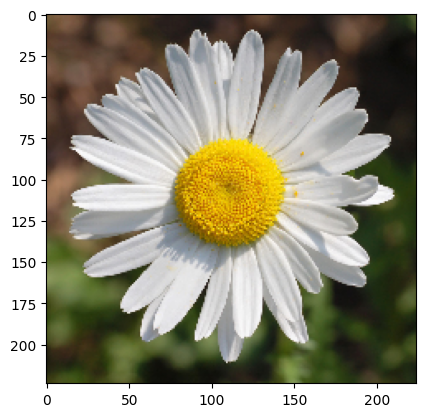

In [ ]:
model_path = '/content/flower5.h5'
model = tf.keras.models.load_model(model_path)


def predict_image(img_path, model):

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0


    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    return predictions, predicted_class

img_path = '/content/hoa cuc.jpg'


predictions, predicted_label = predict_image(img_path, model)

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)


print(f"Xác suất của các lớp: {predictions}")

print(f"Dự đoán nhãn: {specific_flowers[predicted_label[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Xác suất của các lớp: [[2.9520661e-08 3.7112478e-02 6.2958375e-06 9.6288115e-01 5.6361343e-10]]
Dự đoán nhãn: hoahong


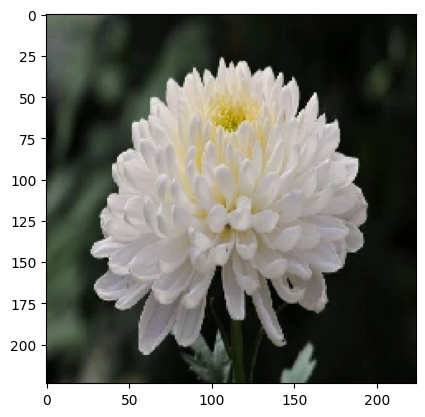

In [ ]:
model_path = '/content/flower5.h5'
model = tf.keras.models.load_model(model_path)


def predict_image(img_path, model):

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0


    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    return predictions, predicted_class

img_path = '/content/hoa cucc.webp'


predictions, predicted_label = predict_image(img_path, model)

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)


print(f"Xác suất của các lớp: {predictions}")

print(f"Dự đoán nhãn: {specific_flowers[predicted_label[0]]}")